In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from scipy.integrate import trapezoid as trap
import matplotlib.pyplot as plt
from peakutils import indexes
from astropy.convolution import convolve, Box1DKernel
import pencil as pc
from IPython.display import display, Latex
import modes

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['text.usetex'] = True

In [3]:
sim = pc.get_sim(quiet=True)
ts = pc.read.ts()

Read 9261 lines.


In [5]:
yaver = pc.read.aver(plane_list='y')

In [6]:
xyaver = pc.read.aver(plane_list=['xy'])

In [7]:
mode = modes.modes(sim, ts, xyaver, yaver, ini=False, dyn=True)

In [8]:
mode.d

0.126

In [9]:
# fig, axs = plt.subplots(2,1, figsize=(16,8), sharex=True)
# mode.butterfly(fig, axs)
# # plt.tight_layout()

In [10]:
data = np.loadtxt('stratification.dat')

In [11]:
# import matplotlib.pyplot as plt
# plt.plot(data[:,0], data[:,2], color='k', ls=':')
# plt.plot(data[:,0], data[:,2], color='k', ls=':')
# # plt.yticks(np.linspace(0, ))

## Variation of Thermodynamic Variables along z

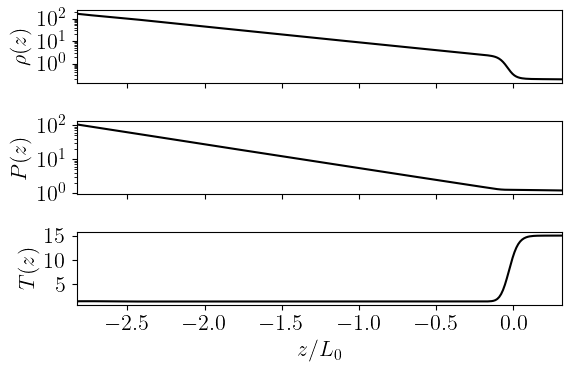

In [12]:
fig, axs = plt.subplots(3,1, figsize=(6,4), sharex=True)

axs[0].plot(mode.z, mode.rho, color='k')
# axs[0].plot(data[:,0], data[:,1], color='k', ls=':')
# axs[1].plot(grid.z, pressure, color='k')
axs[1].plot(mode.z, mode.pre, color='k')
axs[2].plot(mode.z, mode.tem, color='k')

# axs[2].plot(data[:,0], data[:,2], color='b')

#axs[2].plot(grid.z, xya.xy.TTmz[-1], color='k')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
# axs[2].set_yscale("log")

# axs[0].set_xlim(z[0], z[-1])
# axs[1].set_xlim(z[0], z[-1])
axs[2].set_xlim(mode.z[0], mode.z[-1])

axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")

# xticks = (np.pi/10)*np.array([-9, -7, -5, -3, -1, 0, 1])
# axs[2].set_xticks(xticks)
# axs[2].set_xticklabels([r'$-\frac{9\pi}{10}$', r'$-\frac{7\pi}{10}$', r'$-\frac{5\pi}{10}$', \
#                      r'$-\frac{3\pi}{10}$', r'$-\frac{\pi}{10}$', r'$0$', r'$\frac{\pi}{10}$'])
plt.xlabel(r"$z/L_0$")
plt.tight_layout()
#plt.savefig("variation.jpg")

In [13]:
# tem0 = mode.xyaver.xy.TTmz[0,:]
# tem10 = mode.xyaver.xy.TTmz[10,:]
# tem100 = mode.xyaver.xy.TTmz[100,:]
# tem400 = mode.xyaver.xy.TTmz[400,:]

In [14]:
mode.R, mode.gamma, mode.cp

(0.4001, 1.667, 1.0)

In [15]:
cs_sq0 = mode.gamma*mode.xyaver.xy.ppmz/mode.xyaver.xy.rhomz
cs_sq0.shape

(4638, 256)

In [16]:
mode.xyaver.t.shape

(4638,)

In [17]:
def vari(d,u,legend=True):
    fig = plt.figure(figsize=(14,4))
    # for i in range(len(cs_sq0[:,1])):
    for i in range(np.size(cs_sq0[d:u,:],0)):
        plt.plot(mode.z, cs_sq0[d+i,:], label=fr'$t={mode.xyaver.t[d+i]:.3f}$')
    plt.axhline(y=15, ls=':')
    plt.axhline(y=1, ls=':')
    plt.xlim(mode.z[0], mode.z[-1])
    # plt.ylim(0,11)
    plt.legend(loc=6, bbox_to_anchor=(1,0.5))
    # plt.show()

Text(0.5, 1.0, 'in earlier time')

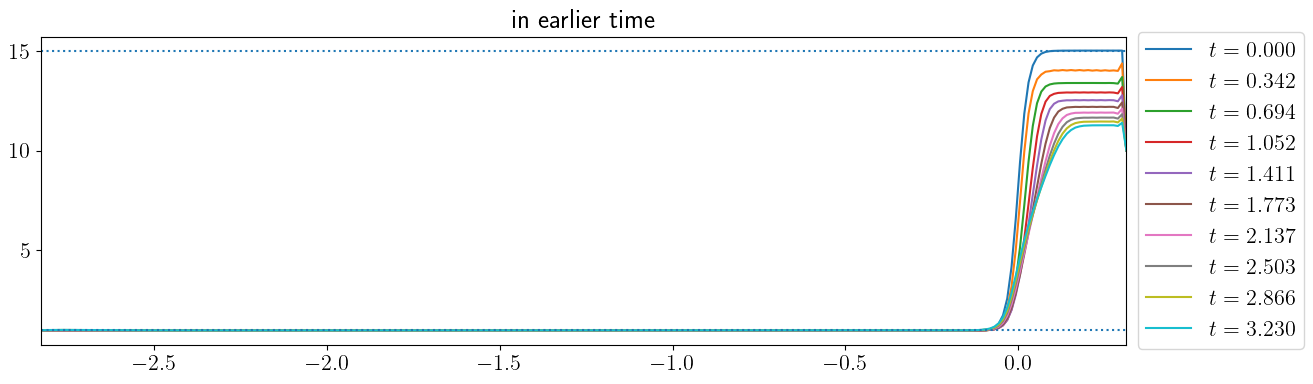

In [18]:
vari(0,10)
plt.title('in earlier time')

Text(0.5, 1.0, 'in later time')

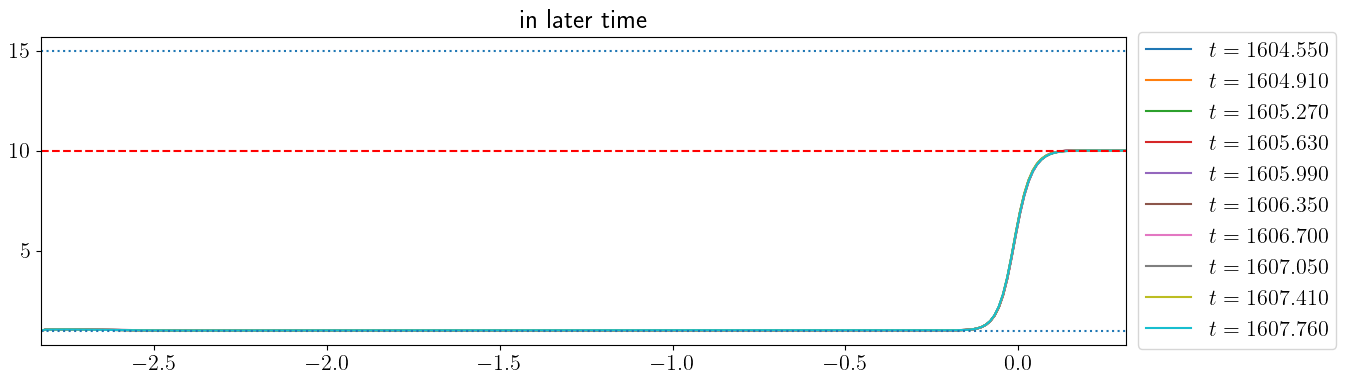

In [19]:
vari(-11,-1)
plt.axhline(y=10, c='r', ls='--')
plt.title('in later time')

In [20]:
# cs_sq = mode.gamma*mode.pre/mode.rho
# fig = plt.figure(figsize=(14,4))
# plt.plot(mode.z, cs_sq, c='k')
# plt.axhline(y=5)
# plt.xlim(mode.z[0], mode.z[-1])
# plt.show()

In [21]:
# m = 5/(mode.R*mode.gamma)
# m

In [22]:
# fig, ax = plt.subplots(figsize=(14,4))
# plt.plot(mode.z, mode.tem, color='k')
# # plt.plot(mode.z, tem0, color='r')
# # plt.plot(mode.z, tem10, color='k')
# # plt.plot(mode.z, tem100, color='g')
# # plt.plot(data[:,0], data[:,2], color='b')
# plt.axhline(y=m, ls='--')
# # plt.yscale("log")
# # plt.ylim(0,10)
# plt.xlim(mode.z[0], mode.z[-1])
# plt.show()

In [23]:
# mode.cs_u

In [24]:
# fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True)

# axs[0].plot(mode.z, mode.bx2mz, color='k')
# # axs[0].plot(mode.z, bxmz, color='k')
# # axs[0].plot(data[:,0], np.exp(data[:,1]), color='k', ls=':')
# # axs[1].plot(grid.z, pressure, color='k')
# axs[1].plot(mode.z, mode.by2mz, color='k')
# # axs[1].plot(mode.z, bymz, color='k')
# #axs[2].plot(grid.z, xya.xy.TTmz[-1], color='k')

# # axs[0].set_yscale("log")
# # axs[1].set_yscale("log")

# # axs[0].set_xlim(z[0], z[-1])
# # axs[1].set_xlim(z[0], z[-1])
# axs[1].set_xlim(mode.z[0], mode.z[-1])

# axs[0].set_ylabel(r"$\langle B_x^2\rangle_{xy}(z)$")
# axs[1].set_ylabel(r"$\langle B_y^2\rangle_{xy}(z)$")

# # xticks = (np.pi/10)*np.array([-9, -7, -5, -3, -1, 0, 1])
# # axs[2].set_xticks(xticks)
# # axs[2].set_xticklabels([r'$-\frac{9\pi}{10}$', r'$-\frac{7\pi}{10}$', r'$-\frac{5\pi}{10}$', \
# #                      r'$-\frac{3\pi}{10}$', r'$-\frac{\pi}{10}$', r'$0$', r'$\frac{\pi}{10}$'])
# plt.xlabel(r"$grid (z)$")
# plt.tight_layout()
# #plt.savefig("variation.jpg")

In [25]:
# bxmz = xyaver.xy.bxmz[-100,:]
# bymz = xyaver.xy.bymz[-100,:]

In [26]:
# var = pc.read.var()

In [27]:
# mode.u_rms_d(var)

In [28]:
mode.u_rms

0.1754

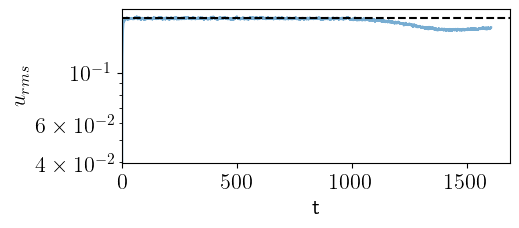

In [29]:
fig = plt.figure(figsize=(5,2))
plt.plot(ts.t, ts.urms, alpha=0.6)
plt.axhline(y=mode.u_rms, c='k', ls='--')
# plt.axvline(x=36.800144)
# plt.axvline(x=436.8019)
# plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [29]:
ts.brms[-1]

0.611548

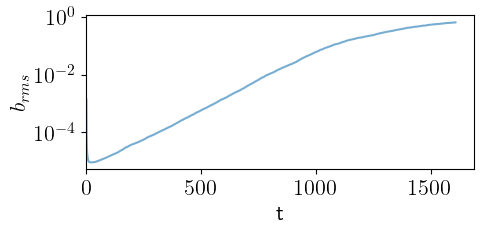

In [30]:
fig = plt.figure(figsize=(5,2))
plt.semilogy(ts.t, ts.brms, alpha=0.6)
# plt.axvline(x=yaver.t[indx_sat_d], c='k', ls=':')
# plt.axvline(x=tt[kin_t_d])
# plt.axvline(x=tt[kin_t_u])
# plt.axhline(y=3.64415e-07, c='k', ls='--')
# plt.axhline(y=ts.brms[-1])
#plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$b_{rms}$")
plt.show()

## using total data

In [31]:
uz_real = yaver.y.uzmxz

In [32]:
uz_real.shape

(3918, 1024, 256)

In [33]:
uz_real[:,:3,3].shape

(3918, 3)

### taking fourier transform of $u_z(t,x,z=0)$ to get $\hat{u}_z(\omega,k_x)$

In [34]:
indx_t1 = np.argmin(np.abs(yaver.t - 40))  #to avoid the transient effects below t=170
# indx_t1 = -1001  #to avoid the transient effects below t=170
indx_t2 = -1

In [35]:
mode.indx_zref, 256*9

(229, 2304)

In [36]:
mode.indx_zref

229

In [37]:
uz_real.shape

(3918, 1024, 256)

In [38]:
tt = yaver.t
tt.shape

(3918,)

In [39]:
t_gd = tt[indx_t1:indx_t2]  #time interval where urms has reached a steady state
t_len = np.size(t_gd)

dkx = 2*np.pi/mode.lx    #unit step along kx direction
dom = 2*np.pi/t_len #unit step alomg omega direction

In [40]:
tt[indx_t2]

1566.801

In [41]:
uz_fourier = mode.FT(uz_real[indx_t1:indx_t2,:,230], 'ortho')

In [42]:
uz_fourier.shape

(3817, 1024)

### we can construct the dimensionless quantity 
$$\tilde{P}(\omega,k_x)=\frac{|\hat{u}_z|}{D^2}$$

In [43]:
logP = mode.logP(uz_fourier, mode.d)
# logP

In [44]:
np.max(logP)

6.771850026263243

In [45]:
logP.shape

(3817, 1024)

In [46]:
# nx = len(mode.grid.x)
# nx
# dkx = 2*np.pi/mode.lx    #unit step along kx direction
# if nx%2 == 0:
#     fnx = np.arange(0, nx/2+1)
#     rnx = -np.flip(np.arange(1, nx/2))
#     kx = np.concatenate((rnx, fnx))*dkx

In [47]:
# print(kx)

In [48]:
aa = np.linspace(0, 2*np.pi,100)

In [49]:
k_tilde = mode.k_tilde()
om_tilde = mode.omega_tilde(indx_t1, indx_t2)

In [50]:
x = mode.grid.x

In [51]:
n_omega, n_kx = np.shape(uz_fourier)

omega = 2*np.pi*np.arange(np.ceil(-n_omega/2), np.ceil(n_omega/2))/(max(t_gd) - min(t_gd))
# kx = 2*np.pi*np.arange(0,n_kx)/(max(x) - min(x))
kx = 2*np.pi*np.arange(np.ceil(-n_kx/2), np.ceil(n_kx/2))/(max(x) - min(x))

In [52]:
om_tilde = omega/mode.omega0
om_tilde

array([-7.9333191 , -7.92916117, -7.92500325, ...,  7.92500325,
        7.92916117,  7.9333191 ])

In [53]:
# np.diff(om_tilde)

In [54]:
k_tilde = kx*mode.L0
k_tilde

array([-87.12508311, -86.95491693, -86.78475075, ...,  86.61458458,
        86.78475075,  86.95491693])

In [55]:
k_tilde[1], np.max(k_tilde)

(-86.95491693183037, 86.95491693183037)

In [56]:
k_f = mode.get_kf()

In [57]:
indx_k_1 = np.argmin(np.abs(k_tilde - 2))
k_1 = round(k_tilde[indx_k_1],3)

In [58]:
np.diff(yaver.t)

array([0.40172973, 0.39949563, 0.39903647, ..., 0.39978027, 0.39892578,
       0.40075684], dtype=float32)

In [59]:
# vmin = -4; vmax = np.max(logP)
# # print(vmax)
# levels = np.linspace(vmin, np.max(logP), 1000)

# [X, Y] = np.meshgrid(k_tilde, om_tilde)

# fig, ax = plt.subplots(1, figsize=(7,5))

# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# # diag = ax.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), levels=levels, cmap='afmhot_r', vmin=vmin, vmax=vmax, extend='min')
# # diag = ax.contourf(X, Y, np.fft.fftshift(logP), levels=levels, cmap='afmhot_r')#, vmin=vmin, vmax=vmax, extend='min')
# diag = ax.contourf(X, Y, logP, levels=levels, cmap='afmhot_r', vmin=vmin, vmax=vmax, extend='min')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2*mode.L0)), 'k')
# # plt.axvline(x=k_1, ls='--', c='k')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2*mode.L0)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')
# # plt.plot(k_tilde, mode.cs_d*k_tilde/(mode.omega0*mode.L0), 'k')
# # plt.plot(k_tilde, mode.cs_u*k_tilde/(mode.omega0*mode.L0), 'k')

# plt.plot(k_tilde, np.sqrt(mode.gz*k_tilde/(mode.omega0**2*mode.L0)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')
# plt.plot(k_tilde, np.sqrt(mode.gz*k_tilde/(mode.omega0**2*mode.L0)), ls='dashdot', c='k')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')
# plt.plot(k_tilde, mode.cs_d*k_tilde/(mode.omega0*mode.L0), ls=':', c='k')
# plt.plot(k_tilde, mode.cs_u*k_tilde/(mode.omega0*mode.L0), ls='--', c='k')

# # plt.plot(aa, mode.cs_u*aa, ls=':', c='k', lw='1')
# # plt.plot(aa, mode.cs_d*aa, ls='--', c='k', lw='1')
# # plt.plot(aa, np.sqrt(mode.gz*aa), ls='dotted', c='k')
# # plt.plot(aa, np.sqrt(mode.gz*aa)*(1-mode.q)/(1+mode.q), ls='dashdot', c='k')

# # plt.xlim(-k_f,k_f)
# # plt.xlim(-10,10)
# plt.xlim(-2*np.pi,2*np.pi)
# # plt.ylim(-k_f,k_f)
# plt.ylim(-2*np.pi,2*np.pi)
# cbar = fig.colorbar(diag, cax=None, ax=ax)
# ticks = np.arange(vmin, vmax)
# cbar.set_ticks(ticks)
# cbar.ax.set_xlabel(r'$lnP$', labelpad=20)
# # plt.colorbar()
# plt.xlabel(r"$\tilde{k}_x$")
# plt.ylabel(r"$\tilde{\omega}$")
# plt.tight_layout()
# plt.savefig('plots/k_om_new.png')
# plt.show()

In [60]:
# k_tilde[int(400/2-1)+1:]

In [61]:
# vmin = np.min(logP); vmax = np.max(logP)
# levels = np.linspace(vmin, np.max(logP), 1000)

# [X, Y] = np.meshgrid(k_tilde, om_tilde)

# fig, ax = plt.subplots(1, figsize=(7,5))

# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# diag = ax.contourf(X, Y, logP, levels=levels, cmap='afmhot_r', vmin=vmin, vmax=vmax, extend='min')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2*mode.L0)), 'k')
# # plt.axvline(x=k_1, ls='--', c='k')
# # plt.plot(k_tilde, mode.cs_d*k_tilde/(mode.omega0*mode.L0), 'k')
# # plt.plot(k_tilde, mode.cs_u*k_tilde/(mode.omega0*mode.L0), 'k')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2*mode.L0)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')

# plt.plot(k_tilde[int(400/2-1)+1:], np.sqrt(mode.gz*k_tilde[int(400/2-1)+1:]), ls=(0, (3, 5, 1, 5)), c='k')
# plt.plot(k_tilde[int(400/2-1)+1:], np.sqrt(mode.gz*k_tilde[int(400/2-1)+1:]/(mode.omega0**2*mode.L0)*(1-mode.q)/(1+mode.q)), ls='dashdot', c='k')
# plt.plot(k_tilde, mode.cs_d*k_tilde/(mode.omega0*mode.L0), ls=':', c='k')
# plt.plot(k_tilde, mode.cs_u*k_tilde/(mode.omega0*mode.L0), ls='--', c='k')

# # plt.plot(aa, mode.cs_u*aa, ls=':', c='k', lw='1')
# # plt.plot(aa, mode.cs_d*aa, ls='--', c='k', lw='1')
# # plt.plot(aa, np.sqrt(mode.gz*aa), ls='dotted', c='k')
# # # plt.plot(aa, np.sqrt(mode.gz*aa)*(1-mode.q)/(1+mode.q), ls='dashdot', c='k')
# # plt.plot(aa, np.sqrt(mode.gz*aa)*(1-mode.q)/(1+mode.q), ls='dashdot', c='k')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2*mode.L0)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')


# # plt.xlim(-k_f,k_f)
# # plt.ylim(-np.pi,np.pi)
# plt.xlim(0,3*np.pi)
# plt.ylim(0,np.max(om_tilde))

# # plt.ylim(-10,10)
# cbar = fig.colorbar(diag, cax=None, ax=ax)
# ticks = np.arange(vmin, vmax)
# cbar.set_ticks(ticks)
# cbar.ax.set_xlabel(r'$lnP$', labelpad=20)
# # plt.colorbar()
# plt.xlabel(r"$\tilde{k}_x$")
# plt.ylabel(r"$\tilde{\omega}$")
# plt.savefig('plots/k_om_quarter1.png')
# plt.show()

In [62]:
# vmin = -4; vmax = np.max(logP)
# levels = np.linspace(-4, np.max(logP), 1000)

# [X, Y] = np.meshgrid(k_tilde, om_tilde)

# fig, ax = plt.subplots(1, figsize=(7,5))

# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# diag = ax.imshow(logP, extent=(min(k_tilde)-0.39269/2,max(k_tilde)+0.39269/2, min(om_tilde)-0.0031471/2,max(om_tilde)+0.0031471/2), origin='lower', aspect='auto', interpolation='none', cmap='afmhot_r', vmin=vmin, vmax=vmax)
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2*mode.L0)), 'k')
# # plt.axvline(x=k_1, ls='--', c='k')
# # plt.plot(k_tilde, mode.cs_d*k_tilde/(mode.omega0*mode.L0), 'k')
# # plt.plot(k_tilde, mode.cs_u*k_tilde/(mode.omega0*mode.L0), 'k')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2*mode.L0)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')

# plt.plot(k_tilde[int(400/2-1)+1:], np.sqrt(mode.gz*k_tilde[int(400/2-1)+1:]), ls=(0, (3, 5, 1, 5)), c='k')
# plt.plot(k_tilde[int(400/2-1)+1:], np.sqrt(mode.gz*k_tilde[int(400/2-1)+1:]/(mode.omega0**2*mode.L0)*(1-mode.q)/(1+mode.q)), ls='dashdot', c='k')
# plt.plot(k_tilde, mode.cs_d*k_tilde/(mode.omega0*mode.L0), ls=':', c='k')
# plt.plot(k_tilde, mode.cs_u*k_tilde/(mode.omega0*mode.L0), ls='--', c='k')

# # plt.plot(aa, mode.cs_u*aa, ls=':', c='k', lw='1')
# # plt.plot(aa, mode.cs_d*aa, ls='--', c='k', lw='1')
# # plt.plot(aa, np.sqrt(mode.gz*aa), ls='dotted', c='k')
# # # plt.plot(aa, np.sqrt(mode.gz*aa)*(1-mode.q)/(1+mode.q), ls='dashdot', c='k')
# # plt.plot(aa, np.sqrt(mode.gz*aa)*(1-mode.q)/(1+mode.q), ls='dashdot', c='k')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2*mode.L0)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')


# plt.xlim(-k_f,k_f)
# plt.ylim(-np.pi,np.pi)
# # plt.ylim(-10,10)
# cbar = fig.colorbar(diag, cax=None, ax=ax)
# ticks = np.arange(vmin, vmax)
# cbar.set_ticks(ticks)
# cbar.ax.set_xlabel(r'$lnP$', labelpad=20)
# # plt.colorbar()
# plt.xlabel(r"$\tilde{k}_x$")
# plt.ylabel(r"$\tilde{\omega}$")
# # plt.savefig('k_om.png')
# plt.show()

In [63]:
2*np.pi/mode.lx

0.16666666666666666

In [64]:
k_indx = np.argmin(np.abs(k_tilde-2))

In [65]:
P = np.exp(logP[:,k_indx])

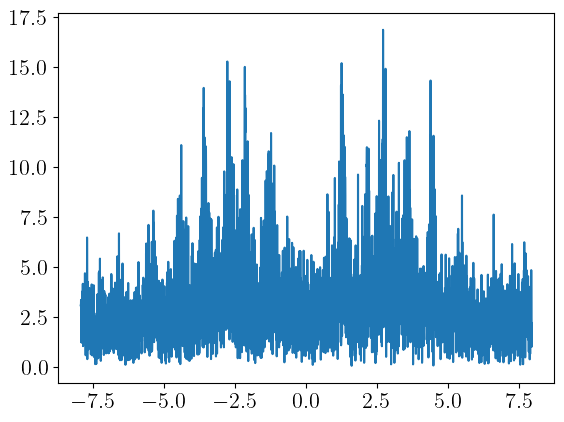

In [66]:
plt.plot(om_tilde, P)

In [67]:
from matplotlib import cm, ticker, colors

In [68]:
# vmin = -4; vmax = np.max(logP)
# # levels = np.linspace(-4, np.max(logP), 1000)

# [X, Y] = np.meshgrid(k_tilde, om_tilde)

# fig, ax = plt.subplots(1, figsize=(7,5))


# lev_exp = np.arange(np.floor(np.log(np.exp(logP).min())-1),
#                    np.ceil(np.log(np.exp(logP).max())+1))
# levs = np.power(10, lev_exp)
# cs = ax.contourf(X, Y, logP, levs, norm=colors.LogNorm())


# # #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# # diag = ax.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(np.exp(logP)), 1000, locator=ticker.LogLocator(), cmap='afmhot_r')#, vmin=vmin, vmax=vmax, extend='min')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2*mode.L0)), 'k')
# # plt.plot(aa, np.sqrt(mode.gz*aa/(mode.omega0**2*mode.L0)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')
# # plt.plot(k_tilde, mode.cs_d*k_tilde/(mode.omega0*mode.L0), 'k')
# # plt.plot(k_tilde, mode.cs_u*k_tilde/(mode.omega0*mode.L0), 'k')
# plt.xlim(-k_f,k_f)
# # plt.ylim(-2*np.pi,2*np.pi)
# # plt.ylim(0,10)
# cbar = fig.colorbar(diag, cax=None, ax=ax)
# # ticks = np.arange(vmin, vmax)
# # cbar.set_ticks(ticks)
# # cbar.ax.set_xlabel(r'$lnP$', labelpad=20)
# # plt.colorbar()
# plt.xlabel(r"$\tilde{k}_x$")
# plt.ylabel(r"$\tilde{\omega}$")
# # plt.savefig('k_om1.png')
# plt.show()

## kinematic Phase

In [69]:
tt = yaver.t
tt.shape

(3918,)

In [70]:
indx_kin_d = np.argmin(np.abs(yaver.t-100))
indx_kin_u = np.argmin(np.abs(yaver.t-1500))

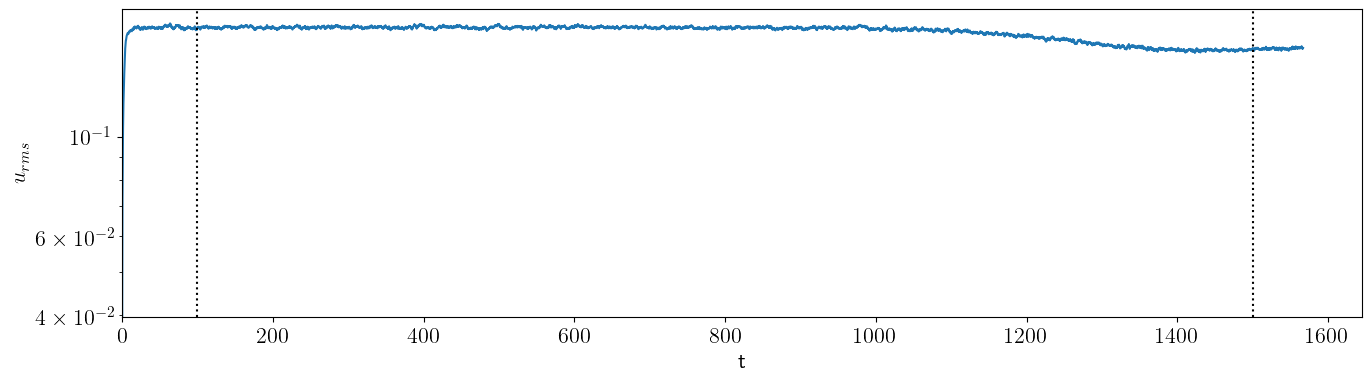

In [86]:
fig = plt.figure(figsize=(16,4))
plt.plot(ts.t, ts.urms)
plt.axvline(x=yaver.t[indx_kin_d], c='k', ls=':')
plt.axvline(x=yaver.t[indx_kin_u], c='k', ls=':')
# plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [72]:
uz_real.shape

(3918, 1024, 256)

In [73]:
uz_fourier_kin = mode.FT(uz_real[indx_kin_d:indx_kin_u,:,212], 'ortho')
logP_kin = mode.logP(uz_fourier_kin, mode.d)
om_tilde_kin = mode.omega_tilde(indx_kin_d, indx_kin_u)

In [74]:
# uz_fourier_kin

In [75]:
kin_len = uz_real[indx_kin_d:indx_kin_u,:,225].shape[0]
kin_len

3500

## saturated phase

In [76]:
indx_sat_d = np.argmin(np.abs(tt-2550))
indx_sat_u = -889

In [77]:
sat_len = uz_real[indx_sat_d:indx_sat_u,:,225].shape[0]
sat_len

0

### we need to select data of same length from kinematic and saturated phase

In [78]:
kin_len == sat_len

False

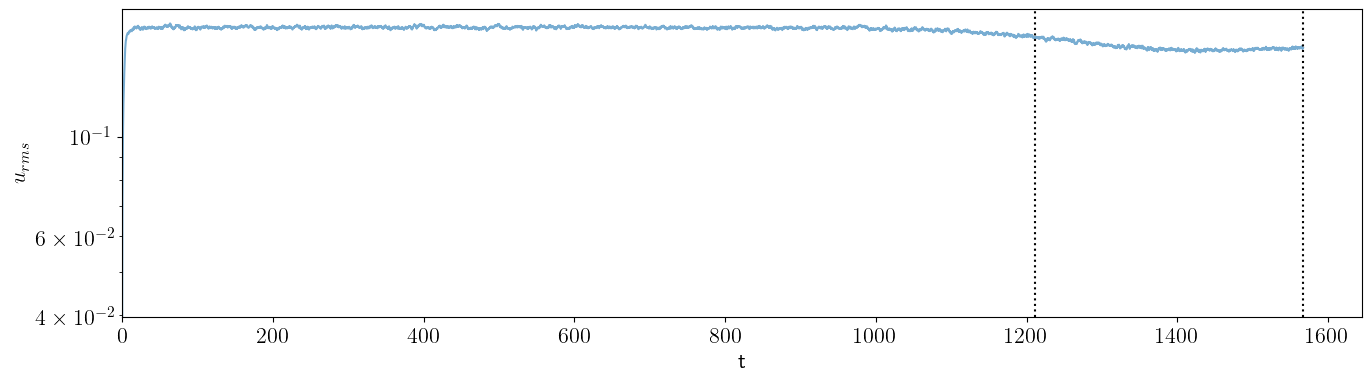

In [79]:
fig = plt.figure(figsize=(16,4))
plt.plot(ts.t, ts.urms, alpha=0.6)
plt.axvline(x=yaver.t[indx_sat_d], c='k', ls=':')
plt.axvline(x=yaver.t[indx_sat_u], c='k', ls=':')
# plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [80]:
# uz_fourier_sat = mode.FT(uz_real[indx_sat_d:indx_sat_u,:,225], 'ortho')
# logP_sat = mode.logP(uz_fourier_sat, mode.d)
# om_tilde_sat = mode.omega_tilde(yaver.t, indx_sat_d, indx_sat_u)

In [81]:
indx_k_1 = np.argmin(np.abs(k_tilde - 1))

### finding $\tilde{P}(\tilde{\omega},\tilde{k}_x=2)$

In [82]:
indx_k_1 = np.argmin(np.abs(k_tilde - 2))
k_1 = round(k_tilde[indx_k_1],3)

In [83]:
k_1

2.042

In [84]:
k_tilde[indx_k_1]

2.0419941353854494

In [102]:
def upto(t1, t2):
        """
        Calculate the index of yaver.t for discarding half of the data.
        ref: Nyquist's theorem.
        """
        "tt=yaver.t"
        t_gd = yaver.t[t1:t2]  #time interval where urms has reached a steady state
        # t_len = np.size(t_gd)
        t_len = np.max(t_gd)-np.min(t_gd)
        T = t_gd.shape[0]
        if t_len%2 == 0:
            # fom = np.arange(0, t_len/2+1)
            fom = np.arange(0, T/2)
        else:
            fom = np.arange(0, T/2)
        print(fom)
        print(fom.shape)
        return len(fom)

In [103]:
upto(indx_kin_d, indx_kin_u)

[0.000e+00 1.000e+00 2.000e+00 ... 1.747e+03 1.748e+03 1.749e+03]
(1750,)


1750

In [87]:
indx_kin = mode.upto(indx_kin_d, indx_kin_u)
# indx_sat = mode.upto(indx_sat_d, indx_sat_u)

In [95]:
indx_kin

1750

In [106]:
om_tilde_kin

array([-7.93558085, -7.93104623, -7.92651161, ...,  7.92197699,
        7.92651161,  7.93104623])

In [105]:
om_tilde_kin[indx_kin:]

array([0.00000000e+00, 4.53461763e-03, 9.06923525e-03, ...,
       7.92197699e+00, 7.92651161e+00, 7.93104623e+00])

In [113]:
P_k1_kin = np.exp(logP_kin[indx_kin:,indx_k_1])
P_k1_kin1 = np.exp(logP_kin[:,indx_k_1])
# P_k1_sat = np.exp(logP_sat[:indx_sat,indx_k_1])

### plotting $\tilde{P}(\tilde{\omega},\tilde{k}_x=2.36)$ as a function of $\tilde{\omega}$

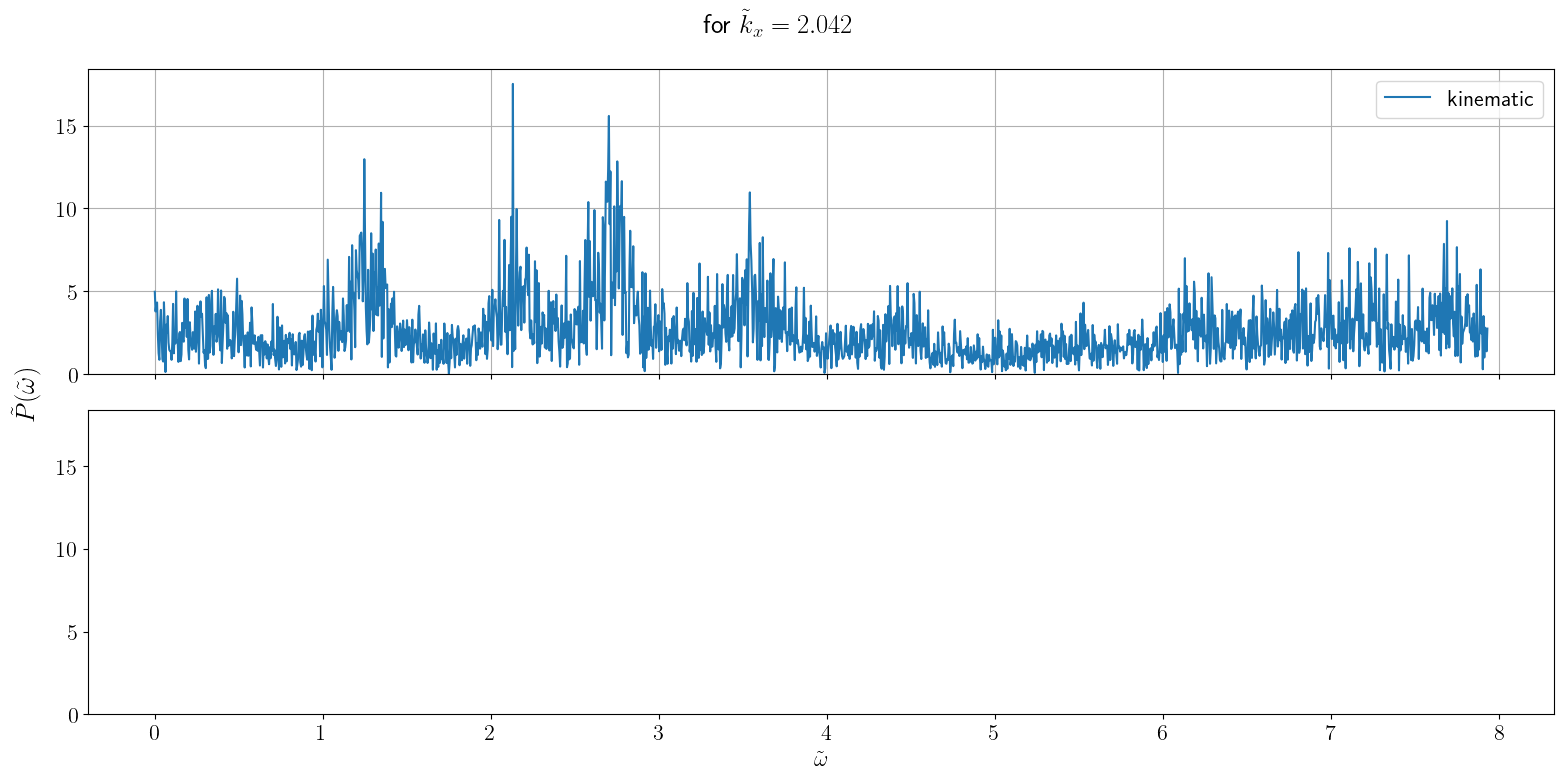

In [118]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(16,8))#sharex=True,

axs[0].plot(om_tilde_kin[indx_kin:], P_k1_kin[:], label='kinematic')
# axs[0].plot(om_tilde_kin[:], P_k1_kin1[:], label='kinematic', alpha=0.4)
axs[0].grid()
# axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

# axs[1].plot(om_tilde_sat[:indx_sat], P_k1_sat[:], label='saturated')
# axs[1].grid()
# axs[1].set_xlim(0, om_tilde_sat[indx_sat-1])
# axs[1].set_ylim(0,)
# axs[1].legend()

# plt.axvline(x=idl_f_kin)
# plt.axvline(x=idu_f_kin)
plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(fr"for $\tilde{{k}}_x={k_1}$")
plt.tight_layout()
plt.show()

### smoothing data

In [119]:
mode.gz

1.0

In [121]:
mode.cs_d**2/(mode.gz*mode.q)

10.000050981675392

In [122]:
mode.L0

1.02

In [138]:
# P_k1_kin_filt = gaussian_filter(P_k1_kin[:indx_kin],3)
P_k1_kin_filt = convolve(P_k1_kin, Box1DKernel(3))
# P_k1_sat_filt = gaussian_filter(P_k1_sat[:indx_sat],3)

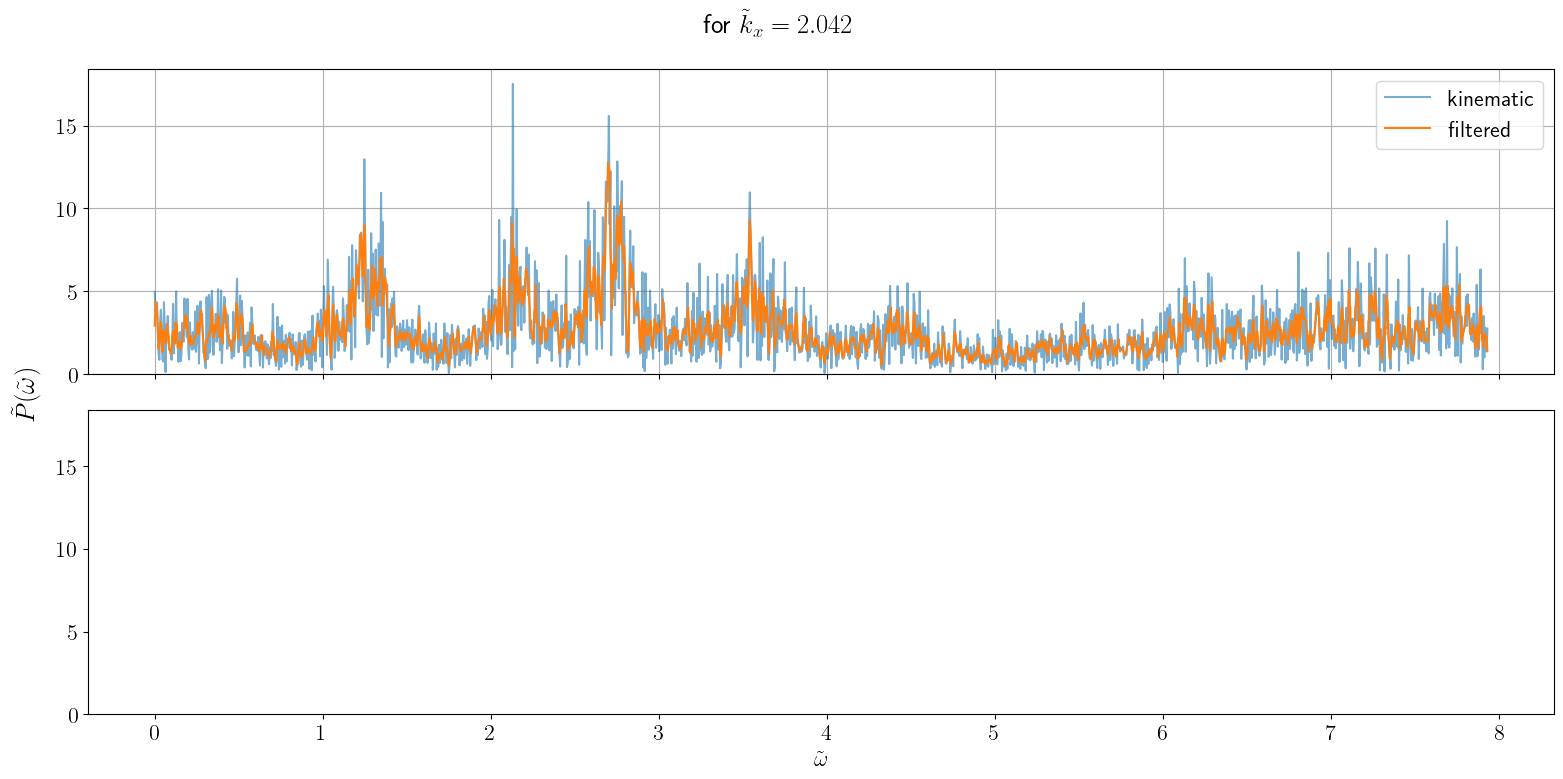

In [169]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(16,8))#sharex=True,

axs[0].plot(om_tilde_kin[indx_kin:], P_k1_kin, alpha=0.6, label='kinematic')
axs[0].plot(om_tilde_kin[indx_kin:], P_k1_kin_filt, label='filtered')
axs[0].grid()
# axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

# axs[1].plot(om_tilde_sat[:indx_sat], P_k1_sat, alpha=0.6, label='saturated')
# axs[1].plot(om_tilde_sat[:indx_sat], P_k1_sat_filt, label='filtered')
# axs[1].grid()
# axs[1].set_xlim(0, om_tilde_sat[indx_sat-1])
# axs[1].set_ylim(0,)
# axs[1].legend()

plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(fr"for $\tilde{{k}}_x={k_1}$")
plt.tight_layout()
plt.show()

In [140]:
mode.q

0.10200947993858069

In [141]:
f_om = round(mode.fmodes(k_1),3)
p_om_0 = round(mode.pmodes_test(k_1,0),3)
p_om_1 = round(mode.pmodes(k_1,1),3)
p_om_2 = round(mode.pmodes(k_1,2),3)
p_om_3 = round(mode.pmodes(k_1,3),3)
p_om_4 = round(mode.pmodes(k_1,4),3)
p_om = []
for i in range(3):
    exec(f'p_om.append(p_om_{i})')

In [142]:
mode.pmodes_test(k_1,0)

2.1637164625551475

In [143]:
mode.pmodes(k_1,0)

2.177775059880731

In [144]:
display(Latex(fr'$\omega_f$ = {f_om}'))
display(Latex(fr'$\omega_{{p0}}$ = {p_om_0}'))
display(Latex(fr'$\omega_{{p1}}$ = {p_om_1}'))
display(Latex(fr'$\omega_{{p2}}$ = {p_om_2}'))
display(Latex(fr'$\omega_{{p3}}$ = {p_om_3}'))
display(Latex(fr'$\omega_{{p4}}$ = {p_om_4}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [145]:
def pmodes(kx_tilde, n: int):
        """
        Calculate the freq of p-mode.
        n: order of p-modes, 0, 1, 2, 3, ...
        """
        om_sq = mode.gz**2/(2*mode.cs_d)**2+mode.cs_d**2*((kx_tilde/mode.L0)**2+((n+0.5)*np.pi/(9*mode.lz/10))**2)
        return np.sqrt(om_sq/mode.omega0**2)

In [146]:
mode.cs_d, mode.cs_u

(1.01, 3.161)

In [147]:
mode.u_rms

0.1754

In [148]:
pmodes(k_1,1)

2.7041839405517494

In [158]:
f_om = round(mode.fmodes(k_1),3)
p_om_0 = round(pmodes(k_1,0),3)
p_om_1 = round(pmodes(k_1,1),3)
p_om_2 = round(pmodes(k_1,2),3)
p_om_3 = round(pmodes(k_1,3),3)
p_om_4 = round(pmodes(k_1,4),3)
p_om = []
for i in range(4):
    exec(f'p_om.append(p_om_{i})')

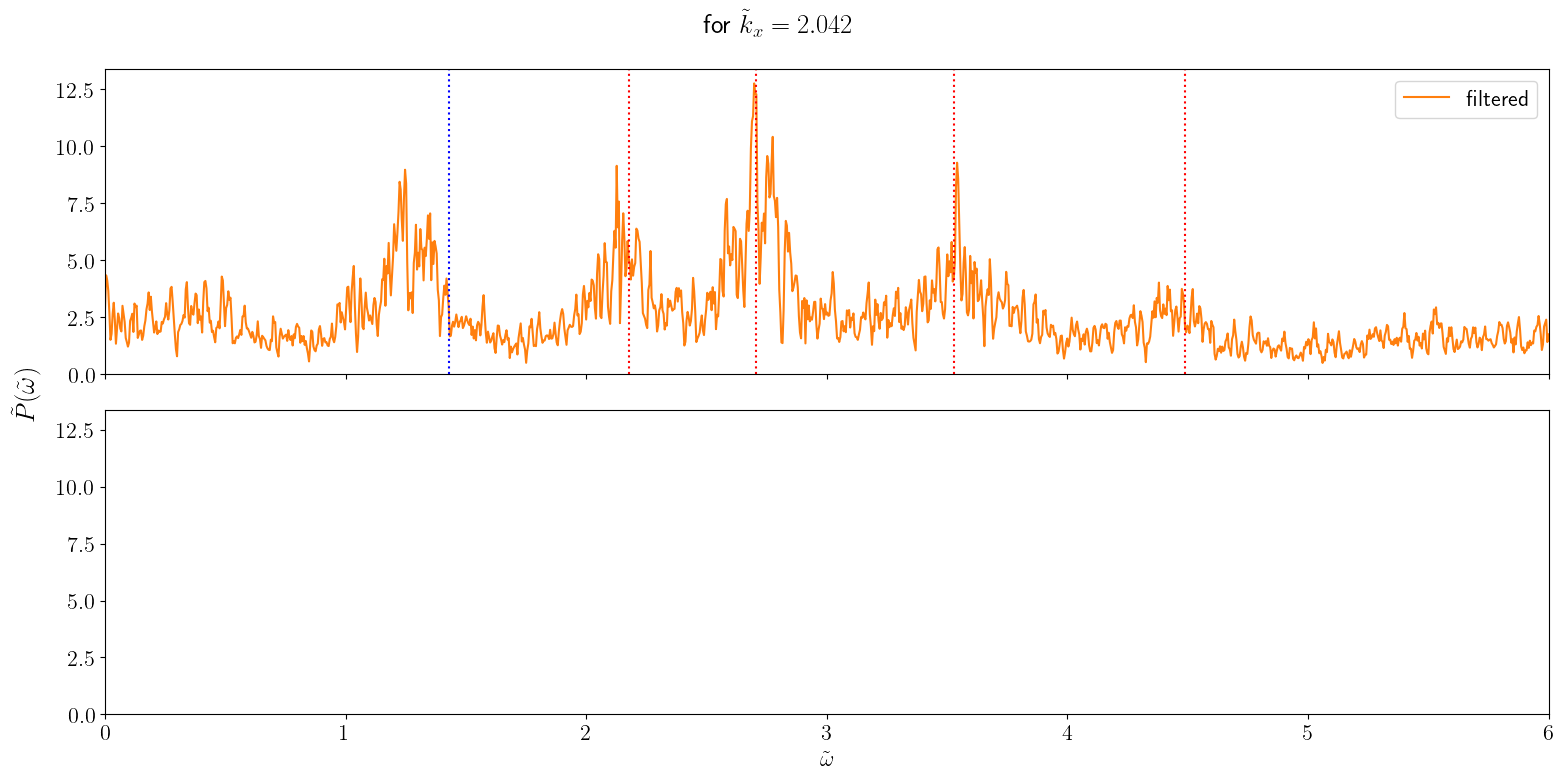

In [159]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(16,8))#sharex=True,

# axs[0].plot(om_tilde_kin[:indx_kin], P_k1_kin, c='k', alpha=0.4, label='kinematic')
axs[0].plot(om_tilde_kin[indx_kin:], P_k1_kin_filt, c='C1', label='filtered')
axs[0].axvline(x=f_om, ls=':', c='b')
for i in range(4):
    axs[0].axvline(x=p_om[i], ls=':', c='r')
axs[0].axvline(x=mode.cs_u*k_1/(mode.L0*mode.omega0), ls='--', c='g')
# axs[0].grid()
axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

# # axs[1].plot(om_tilde_sat[:indx_sat], P_k1_sat, c='k', alpha=0.4, label='saturated')
# axs[1].plot(om_tilde_sat[:indx_sat], P_k1_sat_filt, c='C1', label='filtered')
# axs[1].axvline(x=f_om, ls=':', c='b')
# for i in range(5):
#     axs[1].axvline(x=p_om[i], ls=':', c='r')
# axs[1].axvline(x=mode.cs_u*k_1/(mode.L0*mode.omega0), ls='--', c='g')
# # axs[1].grid()
# axs[1].set_xlim(0, om_tilde_sat[indx_sat-1])
# axs[1].set_ylim(0,)
# axs[1].legend()

plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(fr"for $\tilde{{k}}_x={k_1}$")
#plt.yscale('log')
plt.tight_layout()
plt.show()

## P-modes

### for kinematic phase

index of p-modes

In [170]:
index_kin = mode.mode_finder(om_tilde_kin[indx_kin:], P_k1_kin, False, thres=0.2, min_dist=200)
mode_index_kin = np.array([])
# for i in range(len(index_kin)):
i = 0
while index_kin[i]<300:
        index_kin = np.delete(index_kin, i)
        # i += i+1
mode_index_kin = index_kin
        
lb_kin = [130, 130, 130, 130, 120]
ub_kin = [130, 130, 130, 130, 120]

indx_list_kin = []
om_mode_kin = []
for i in range(0,len(mode_index_kin)-2):
    indx_list_kin.append(mode.mode_indx(mode_index_kin[i], lb_kin[i], ub_kin[i]))
    om_mode_kin.append(om_tilde_kin[indx_list_kin[i]['lb']:indx_list_kin[i]['ub']])
# lb[0], lb[-1], mode_index

In [171]:
# p_mode = []
# for i in range(5):
#     p_mode.append(mode.mode_data1(P_k1_kin, om_tilde_kin[:indx_kin], mode_index[i],130,130))

In [172]:
p_mode_kin = []
for i in range(len(mode_index_kin)-2):
    p_mode_kin.append(mode.mode_data(P_k1_kin, om_tilde_kin[:indx_kin], indx_list_kin[i]))

IndexError: list index out of range

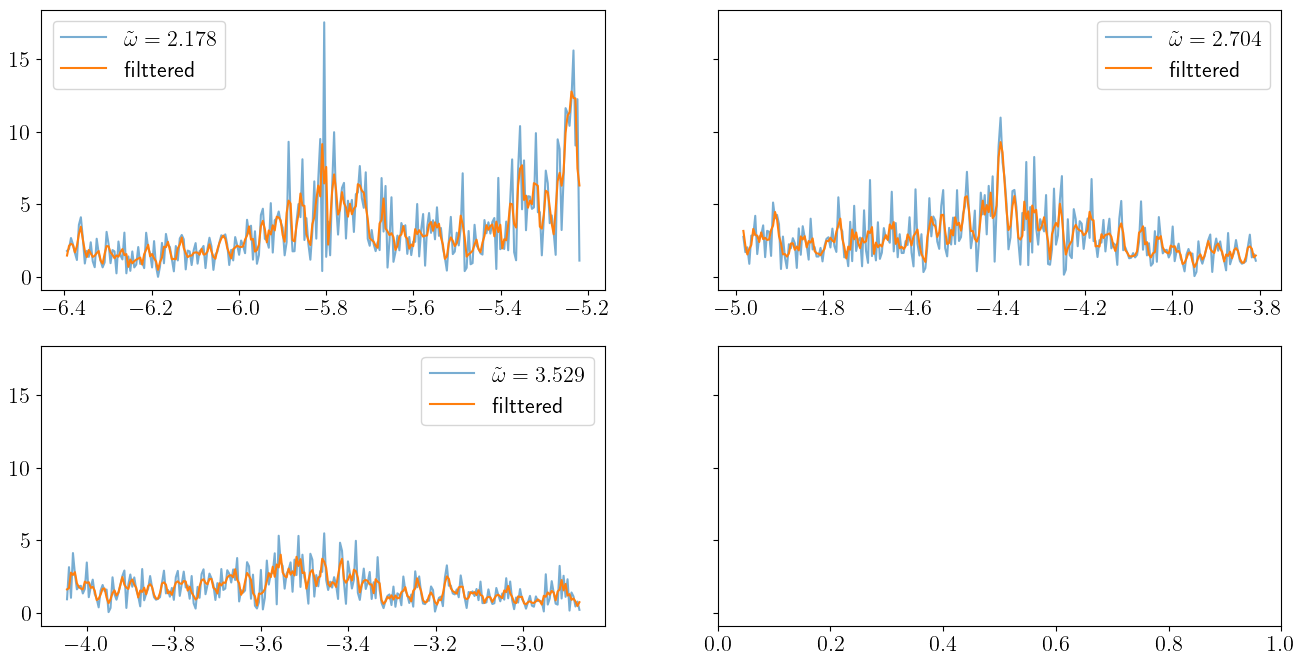

In [173]:
i = 0
fig, axs = plt.subplots(2,2, sharey=True, figsize=(16,8))

axs[0,0].plot(p_mode_kin[i]['x'], p_mode_kin[i]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i]}$")
axs[0,0].plot(om_mode_kin[i], P_k1_kin_filt[indx_list_kin[i]['lb']:indx_list_kin[i]['ub']], label='filttered')
# axs[0,0].axvline(x = om_tilde_kin[mode_index_kin[1]])
axs[0,0].legend()
axs[0,1].plot(p_mode_kin[i+1]['x'], p_mode_kin[i+1]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+1]}$")
axs[0,1].plot(om_mode_kin[i+1], P_k1_kin_filt[indx_list_kin[i+1]['lb']:indx_list_kin[i+1]['ub']], label='filttered')
axs[0,1].legend()
axs[1,0].plot(p_mode_kin[i+2]['x'], p_mode_kin[i+2]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+2]}$")
axs[1,0].plot(om_mode_kin[i+2], P_k1_kin_filt[indx_list_kin[i+2]['lb']:indx_list_kin[i+2]['ub']], label='filttered')
axs[1,0].legend()
axs[1,1].plot(p_mode_kin[i+3]['x'], p_mode_kin[i+3]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+3]}$")
axs[1,1].plot(om_mode_kin[i+3], P_k1_kin_filt[indx_list_kin[i+3]['lb']:indx_list_kin[i+3]['ub']], label='filttered')
axs[1,1].legend()

plt.suptitle('p-modes for kinetic phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

### fitting

In [164]:
def lorentzian(x, a, b, c, d, e):
    y = a/((x-b)**2+np.exp(c))+d+e*x
    return y

In [165]:
sig_kin = []
sig_kin_p = []
for i in range(0,len(mode_index_kin)-2):
    sig_kin.append(mode.sigma(p_mode_kin[i]['y'], P_k1_kin_filt[indx_list_kin[i]['lb']:indx_list_kin[i]['ub']]))
    sig_kin_p.append(sig_kin[i]*np.ones(len(p_mode_kin[i]['y'])))

In [166]:
p0_kin = []
fitted_kin_p = []
for i in range(0,len(mode_index_kin)-2):
    p0_kin.append(np.array([2,om_tilde_kin[mode_index_kin[i]],-2,100,0.1]))
    fitted_kin_p.append(mode.mode_fit(lorentzian,om_tilde_kin[indx_list_kin[i]['lb']:indx_list_kin[i]['ub']],p_mode_kin[i]['y'], base=True, p0=p0_kin[i]))

In [167]:
p_mode_om_kin = []
for i in range(0,len(mode_index_kin)-1):
    p_mode_om_kin.append(round(om_tilde_kin[mode_index_kin[i]],3))

IndexError: list index out of range

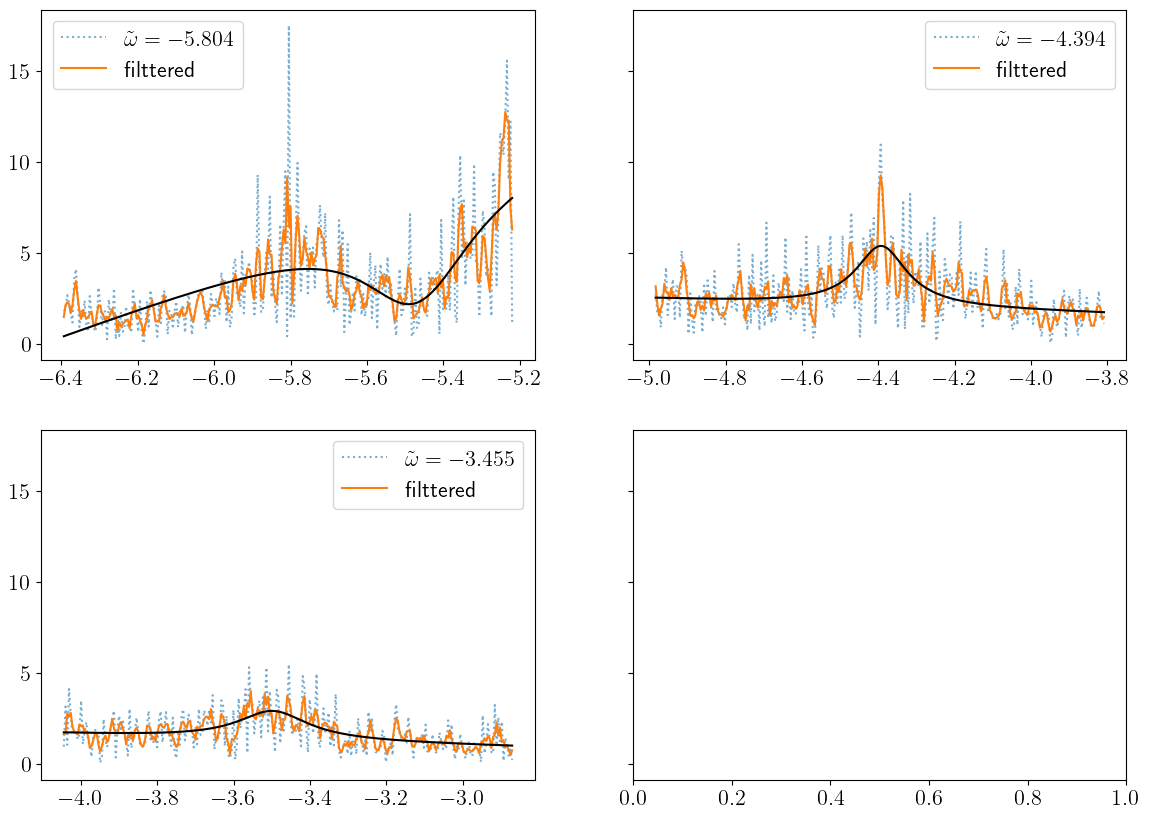

In [168]:
i = 0
fig, axs = plt.subplots(2,2, sharey=True, figsize=(14,10))

axs[0,0].plot(p_mode_kin[i]['x'], p_mode_kin[i]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_kin[i]}$")
axs[0,0].plot(om_mode_kin[i], P_k1_kin_filt[indx_list_kin[i]['lb']:indx_list_kin[i]['ub']], label='filttered')
axs[0,0].plot(om_mode_kin[i], fitted_kin_p[i], color='k')
# axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axs[0,0].legend()

axs[0,1].plot(p_mode_kin[i+1]['x'], p_mode_kin[i+1]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_kin[i+1]}$")
axs[0,1].plot(om_mode_kin[i+1], P_k1_kin_filt[indx_list_kin[i+1]['lb']:indx_list_kin[i+1]['ub']], label='filttered')
axs[0,1].plot(om_mode_kin[i+1], fitted_kin_p[i+1], color='k')
# axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axs[0,1].legend()

axs[1,0].plot(p_mode_kin[i+2]['x'], p_mode_kin[i+2]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_kin[i+2]}$")
axs[1,0].plot(om_mode_kin[i+2], P_k1_kin_filt[indx_list_kin[i+2]['lb']:indx_list_kin[i+2]['ub']], label='filttered')
axs[1,0].plot(om_mode_kin[i+2], fitted_kin_p[i+2], color='k')
# axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axs[1,0].legend()

axs[1,1].plot(p_mode_kin[i+3]['x'], p_mode_kin[i+3]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_kin[i+3]}$")
axs[1,1].plot(om_mode_kin[i+3], P_k1_kin_filt[indx_list_kin[i+3]['lb']:indx_list_kin[i+3]['ub']], label='filttered')
axs[1,1].plot(om_mode_kin[i+3], fitted_kin_p[i+3], color='k')
# axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axs[1,1].legend()

plt.suptitle('p-modes for kinematic phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

### for saturated phase

index of p-modes

In [ ]:
index_sat = mode.mode_finder(om_tilde_sat[:indx_sat], P_k1_sat, False, thres=0.2, min_dist=200)
mode_index_sat = np.array([])
for i in range(len(index_sat)):
    if index_sat[i]<80:
        mode_index_sat = np.delete(index_sat, i)

lb_sat = [130, 130, 130, 130, 120]
ub_sat = [130, 130, 130, 130, 120]

indx_list_sat = []
om_mode_sat = []
for i in range(0,len(mode_index_sat)-2):
    indx_list_sat.append(mode.mode_indx(mode_index_sat[i], lb_sat[i], ub_sat[i]))
    om_mode_sat.append(om_tilde_sat[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']])
# lb[0], lb[-1], mode_index

: 

In [ ]:
mode_index_sat

: 

In [ ]:
mode_index_kin

: 

In [ ]:
p_mode_sat = []
for i in range(len(mode_index_sat)-2):
    p_mode_sat.append(mode.mode_data(P_k1_sat, om_tilde_sat[:indx_sat], indx_list_sat[i]))

: 

In [ ]:
i = 0
fig, axs = plt.subplots(2,2, sharey=True, figsize=(16,8))

axs[0,0].plot(p_mode_sat[i]['x'], p_mode_sat[i]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i]}$")
axs[0,0].plot(om_mode_sat[i], P_k1_sat_filt[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']], label='filttered')
# axs[0,0].axvline(x = om_tilde_sat[mode_index_sat[1]])
axs[0,0].legend()
axs[0,1].plot(p_mode_sat[i+1]['x'], p_mode_sat[i+1]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+1]}$")
axs[0,1].plot(om_mode_sat[i+1], P_k1_sat_filt[indx_list_sat[i+1]['lb']:indx_list_sat[i+1]['ub']], label='filttered')
axs[0,1].legend()
axs[1,0].plot(p_mode_sat[i+2]['x'], p_mode_sat[i+2]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+2]}$")
axs[1,0].plot(om_mode_sat[i+2], P_k1_sat_filt[indx_list_sat[i+2]['lb']:indx_list_sat[i+2]['ub']], label='filttered')
axs[1,0].legend()
axs[1,1].plot(p_mode_sat[i+3]['x'], p_mode_sat[i+3]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+3]}$")
axs[1,1].plot(om_mode_sat[i+3], P_k1_sat_filt[indx_list_sat[i+3]['lb']:indx_list_sat[i+3]['ub']], label='filttered')
axs[1,1].legend()

plt.suptitle('p-modes for satetic phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

: 

In [ ]:
sig_sat = []
sig_sat_p = []
for i in range(0,len(mode_index_sat)-2):
    sig_sat.append(mode.sigma(p_mode_sat[i]['y'], P_k1_sat_filt[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']]))
    sig_sat_p.append(sig_sat[i]*np.ones(len(p_mode_sat[i]['y'])))

: 

In [ ]:
p0_sat = []
fitted_sat_p = []
for i in range(0,len(mode_index_sat)-2):
    p0_sat.append(np.array([2,om_tilde_sat[mode_index_sat[i]],-2,100,0.1]))
    fitted_sat_p.append(mode.mode_fit(lorentzian,om_tilde_sat[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']],p_mode_sat[i]['y'],True, p0=p0_sat[i]))

: 

In [ ]:
p_mode_om_sat = []
for i in range(0,len(mode_index_sat)-1):
    p_mode_om_sat.append(round(om_tilde_sat[mode_index_sat[i]],3))

: 

In [ ]:
i = 0
fig, axs = plt.subplots(2,2, sharey=True, figsize=(14,10))

axs[0,0].plot(p_mode_sat[i]['x'], p_mode_sat[i]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i]}$")
axs[0,0].plot(om_mode_sat[i], P_k1_sat_filt[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']], label='filttered')
axs[0,0].plot(om_mode_sat[i], fitted_sat_p[i], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[0,0].legend()

axs[0,1].plot(p_mode_sat[i+1]['x'], p_mode_sat[i+1]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i+1]}$")
axs[0,1].plot(om_mode_sat[i+1], P_k1_sat_filt[indx_list_sat[i+1]['lb']:indx_list_sat[i+1]['ub']], label='filttered')
axs[0,1].plot(om_mode_sat[i+1], fitted_sat_p[i+1], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[0,1].legend()

axs[1,0].plot(p_mode_sat[i+2]['x'], p_mode_sat[i+2]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i+2]}$")
axs[1,0].plot(om_mode_sat[i+2], P_k1_sat_filt[indx_list_sat[i+2]['lb']:indx_list_sat[i+2]['ub']], label='filttered')
axs[1,0].plot(om_mode_sat[i+2], fitted_sat_p[i+2], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[1,0].legend()

axs[1,1].plot(p_mode_sat[i+3]['x'], p_mode_sat[i+3]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i+3]}$")
axs[1,1].plot(om_mode_sat[i+3], P_k1_sat_filt[indx_list_sat[i+3]['lb']:indx_list_sat[i+3]['ub']], label='filttered')
axs[1,1].plot(om_mode_sat[i+3], fitted_sat_p[i+3], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[1,1].legend()

plt.suptitle('p-modes for saturated phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

: 

## $k_x$ vs. mode parameters

In [ ]:
indx_k = [1,2,3,4,5]

: 

### frequencies of f-modes for different $k_x$

In [ ]:
f_mode_om = []
for i in range(len(indx_k)):
    f_mode_om.append(round(mode.fmodes(round(k_tilde[indx_k[i]],3)),3))

: 

### frequencies of p-modes for different $k_x$

In [ ]:
p_mode_om = np.empty([len(indx_k),3])

for i in range(len(indx_k)):
    for j in range(3):
        p_mode_om[i,j] = round(mode.pmodes(k_tilde[indx_k[i]],j),3)

: 

In [ ]:
p_mode_om.shape

: 

In [ ]:
P_k_kin = []
P_k_sat = []

P_k_kin_filt = []
P_k_sat_filt = []

for i in range(len(indx_k)):
    P_k_kin.append(np.exp(logP_kin[:indx_kin,indx_k[i]]))
    P_k_sat.append(np.exp(logP_sat[:indx_sat,indx_k[i]]))
    P_k_kin_filt.append(gaussian_filter(P_k_kin[i],3))
    P_k_sat_filt.append(gaussian_filter(P_k_sat[i],3))

: 

In [ ]:
fig, axs = plt.subplots(4,1, figsize=(16,12))#sharex=True,

axs[0].plot(om_tilde_kin[:indx_kin], P_k_kin[0], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[1],3)}$')
axs[0].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[0], c='C2', label=r'$filttered$')
# axs[0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), fitted_p2_kin_lor_1, color='k', label=r'$fitted$')
axs[0].axvline(x=f_mode_om[0], ls=':')
for i in range(3):
    axs[0].axvline(x=p_mode_om[0,i], c='r', ls=':')
# axs[0].grid()
axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

axs[1].plot(om_tilde_kin[:indx_kin], P_k_kin[1], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[2],3)}$')
axs[1].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[1], c='C2', label=r'$filttered$')
# axs[1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), fitted_p2_kin_lor_2, color='k', label=r'$fitted$')
axs[1].axvline(x=f_mode_om[1], ls=':')
for i in range(3):
    axs[1].axvline(x=p_mode_om[1,i], c='r', ls=':')
# axs[1].grid()
axs[1].set_xlim(0, 6)
axs[1].set_ylim(0,)
axs[1].legend()

axs[2].plot(om_tilde_kin[:indx_kin], P_k_kin[2], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[3],3)}$')
axs[2].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[2], c='C2', label=r'$filttered$')
# axs[2].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), fitted_p2_kin_lor_3, color='k', label=r'$fitted$')
axs[2].axvline(x=f_mode_om[2], ls=':')
for i in range(3):
    axs[2].axvline(x=p_mode_om[2,i], c='r', ls=':')
# axs[2].grid()
axs[2].set_xlim(0, 6)
axs[2].set_ylim(0,)
axs[2].legend()

axs[3].plot(om_tilde_kin[:indx_kin], P_k_kin[3], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[4],3)}$')
axs[3].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[3], c='C2', label=r'$filttered$')
axs[3].axvline(x=f_mode_om[3], ls=':')
# axs[3].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), fitted_p2_kin_lor_4, color='k', label=r'$fitted$')
for i in range(3):
    axs[3].axvline(x=p_mode_om[3,i], c='r', ls=':')
# axs[3].grid()
axs[3].set_xlim(0, 6)
axs[3].set_ylim(0,)
axs[3].legend()


# plt.axvline(x=idl_f_kin)
# plt.axvline(x=idu_f_kin)
plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
# plt.suptitle(r"for $\tilde{k}_x=2$")
plt.tight_layout()
plt.show()

: 

: 

: 

In [ ]:
f_om

: 

: 